## Purpose

In this project, I attempt to complete a machine learning model to predict employee attrition activity in this IBM dataset. The project includes a brief data exploratory section which leads into the machine learning model sections. I will then evaluate model performances to predict employee attirtion activity and analyze what employee attribute(s) lead to attrition. 

In [1]:
import sys
!{sys.executable} -m pip install xgboost

In [2]:
# importing essential libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
# setup get_shape function to look at the shape of data
def get_shape(df):
    print('Now there are', df.shape[0], 'rows and',df.shape[1],'columns in this dataset')

In [5]:
# print out the shape of the dataset
get_shape(df)

Now there are 1470 rows and 35 columns in this dataset


In [6]:
# count unique values of each column
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

## Data Preparation

Let's see if there is any null values or missing values in the data

In [7]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

Perfect. We have no missing values in this dataset. If there is any, we would have to fill in or drop the data depending on the use case.

Next, we want to see if there is any duplicates

In [8]:
df[df.duplicated(keep='first')].shape

(0, 35)

No duplicates as shown above

Let's have a look at the data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Let's seperate categorical and numerical data

In [10]:
# separate features into numerical and non numerical groups
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

In [11]:
# check summary stats and distribution numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


## Data Cleaning

We can look at the summary and ask ourselves if the columns make sense or have value for us. We can take out redundant columns if the values of the column are meaningless to our analysis.

Column 'EmployeeNumber' is unique to each employee but has no concrete meaning unless there is some sort of number conventions that the employee number follows. Even then, other columns in the dataset should cover any meaning there is in those conventions. Therefore, we take this column out of the analysis. 

Column 'EmployeeCount' is all 1s which means that 1 employee links to 1 row of data. Since it is all 1s, we can take this column out. 

Column 'StandardHours' is all 80s which means just means everyone in the dataset works the same full time hours. This gives us this information but since it is all same across all observations, we can take this out. 

Column 'Over18' is a column that tells us that every employee in this dataset is over 18. This is redundant as all observations are the same. Unless there will be any under 18 employees that will be hired in the future, this column is not required. 

In [12]:
# drop aformentioned columns
df = df.drop(columns = ['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


## EDA

Brief Exploratory Data Analysis to get a feeling of what is going on and give us some idea on what to do in later sections.

Let's have a look at how many employees in this dataset moved on from the companay (attrition). This is our target variable.

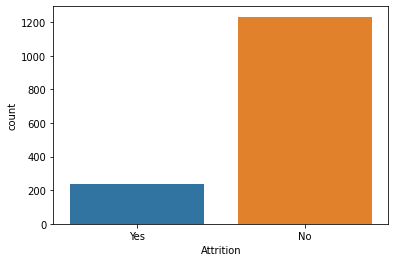

In [13]:
# plot distribution for attrition
sns.countplot(x = 'Attrition', data = df)
plt.savefig('attrition.png')

We can see there is an uneven distribution between yes and no in the attrition variable. While the imbalance is not a huge issue, we could look into using something like SMOTE to synthetically create data for the yes side but we will leave that to another time.

Let's look at how the numeric variables fare when we put it into two bins based on the binary distribution of attrition.

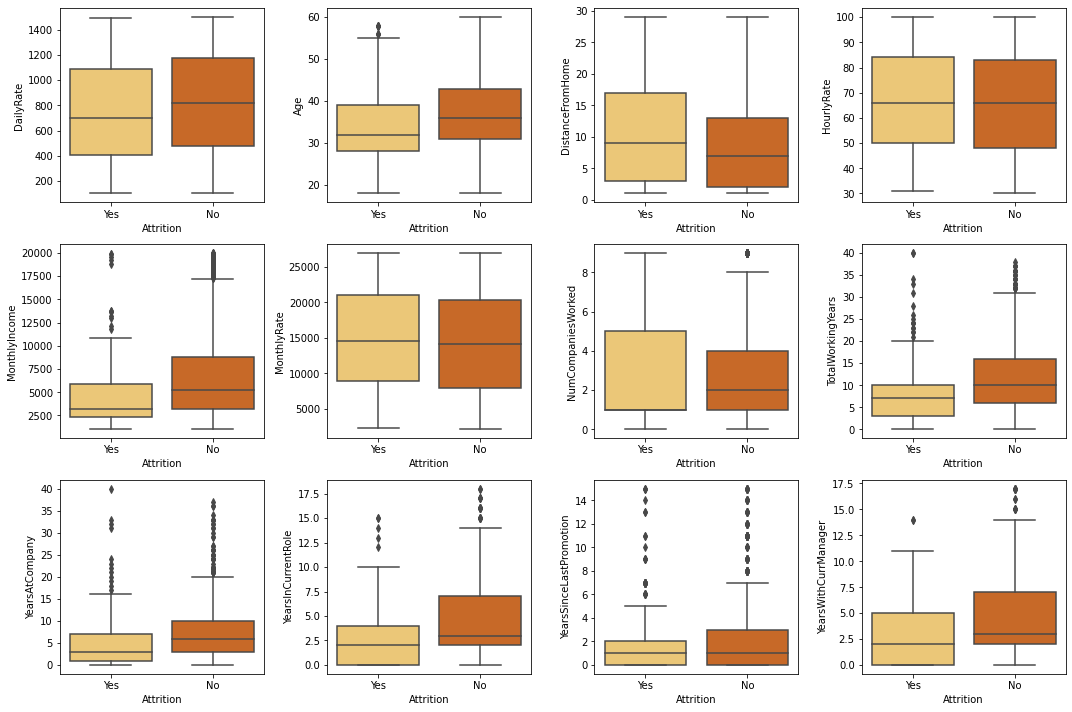

In [14]:
# visualization for numerical features
fig, axss = plt.subplots(3,4, figsize=[15,10])
sns.boxplot(x='Attrition', y ='DailyRate', data=df, ax=axss[0][0],palette="YlOrBr")
sns.boxplot(x='Attrition', y ='Age', data=df, ax=axss[0][1],palette="YlOrBr")
sns.boxplot(x='Attrition', y ='DistanceFromHome', data=df, ax=axss[0][2],palette="YlOrBr")
sns.boxplot(x='Attrition', y ='HourlyRate', data=df, ax=axss[0][3],palette="YlOrBr")
sns.boxplot(x='Attrition', y ='MonthlyIncome', data=df, ax=axss[1][0],palette="YlOrBr")
sns.boxplot(x='Attrition', y ='MonthlyRate', data=df, ax=axss[1][1],palette="YlOrBr")
sns.boxplot(x='Attrition', y ='NumCompaniesWorked', data=df, ax=axss[1][2],palette="YlOrBr")
sns.boxplot(x='Attrition', y ='TotalWorkingYears', data=df, ax=axss[1][3],palette="YlOrBr")
sns.boxplot(x='Attrition', y ='YearsAtCompany', data=df, ax=axss[2][0],palette="YlOrBr")
sns.boxplot(x='Attrition', y ='YearsInCurrentRole', data=df, ax=axss[2][1],palette="YlOrBr")
sns.boxplot(x='Attrition', y ='YearsSinceLastPromotion', data=df, ax=axss[2][2],palette="YlOrBr")
sns.boxplot(x='Attrition', y ='YearsWithCurrManager', data=df, ax=axss[2][3],palette="YlOrBr")
plt.tight_layout()
plt.savefig('numerical_dist.png');

At the first glance, it seems most of the numeric variables/features are somewhat similar between the binary option of attrtion. But, when we look closer, we can see that variables such as **age**, **years in current role**, **years with current manager** and **daily rate** is showing some signs of contributing to attrition. 

Let's look at the categorical variables

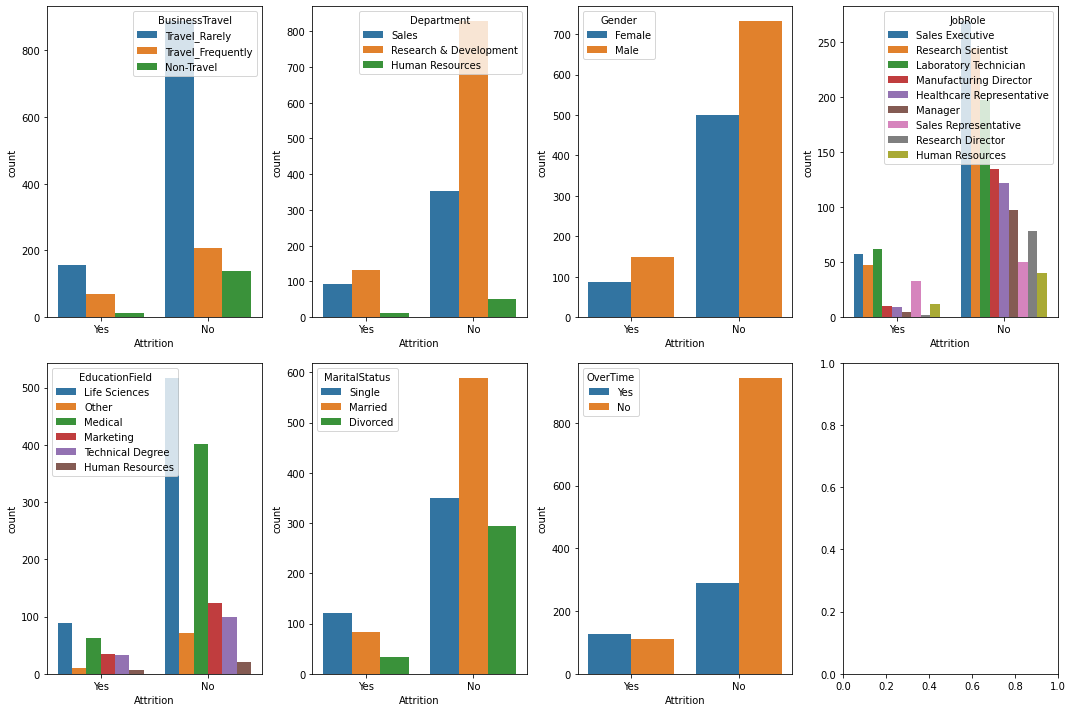

In [15]:
# visualization for non numerical features
fig,axss = plt.subplots(2,4, figsize=[15,10])
sns.countplot(x='Attrition', hue='BusinessTravel', data=df, ax=axss[0][0])
sns.countplot(x='Attrition', hue='Department', data=df, ax=axss[0][1])
sns.countplot(x='Attrition', hue='Gender', data=df, ax=axss[0][2])
sns.countplot(x='Attrition', hue='JobRole', data=df, ax=axss[0][3])
sns.countplot(x='Attrition', hue='EducationField', data=df, ax=axss[1][0])
sns.countplot(x='Attrition', hue='MaritalStatus', data=df, ax=axss[1][1])
sns.countplot(x='Attrition', hue='OverTime', data=df, ax=axss[1][2])
plt.tight_layout()
plt.savefig('cate_dist.png');

We can clearly see variables such as **Maritial Status** and **Overtime** having an impact on the attrtion numbers. **Business Travel** is another one that we should keep an eye on.

Lets dig deeper in a couple of columns

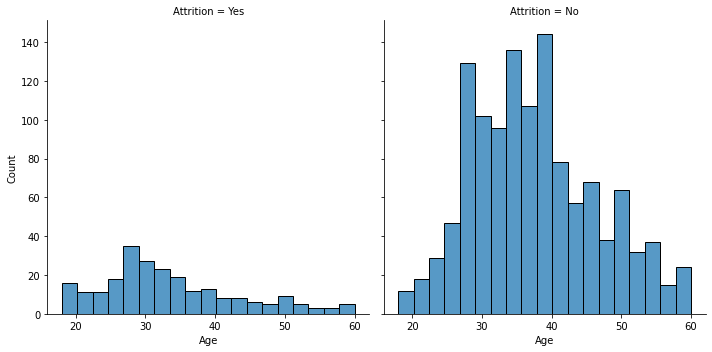

In [16]:
sns.displot(x='Age', col='Attrition', data=df)
plt.show()

Since we are more interested in employees that are leaving the company, let's investigate the graph on the left further. 

In [17]:
att_df = df.loc[df['Attrition'] == 'Yes']

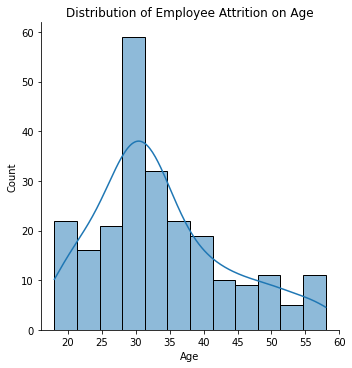

In [18]:
sns.displot(x='Age', data=att_df, kde = True).set(title = 'Distribution of Employee Attrition on Age')
plt.show()

We can see clearly that younger employee do make up most of the employees that are leaving the company. 

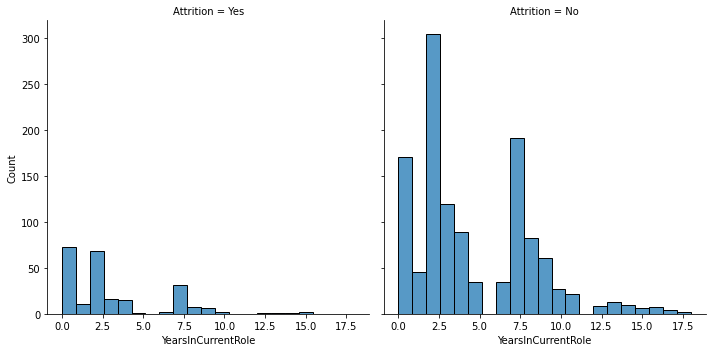

In [19]:
sns.displot(x='YearsInCurrentRole', col='Attrition', data=df)
plt.show()

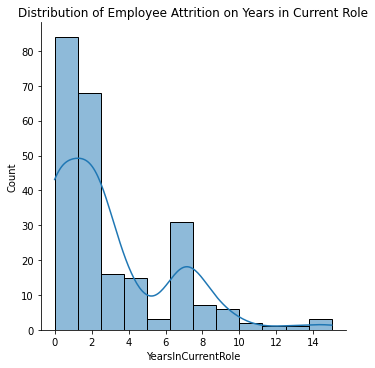

In [20]:
sns.displot(x='YearsInCurrentRole', data=att_df, kde = True).set(title = 'Distribution of Employee Attrition on Years in Current Role')
plt.show()

We can see that within people who leave the company, it is mainly employees who are in the same role for less than 3 years, or employees who are in the same role for 7 years. 

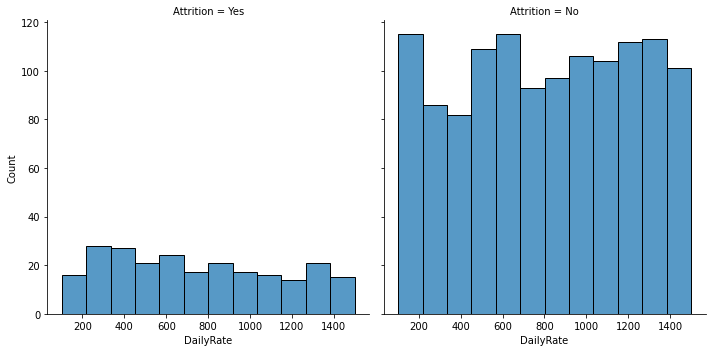

In [21]:
sns.displot(x='DailyRate', col='Attrition', data=df)
plt.show()

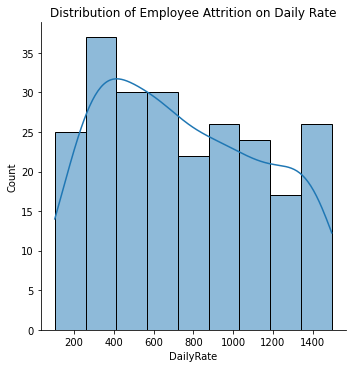

In [22]:
sns.displot(x='DailyRate', data=att_df, kde = True).set(title = 'Distribution of Employee Attrition on Daily Rate')
plt.show()

There is actually not much difference in terms of attrition between low daily rate and high daily rate. This is interesting because one would assume that low daily rate employees would have a higher chance of leaving the company.

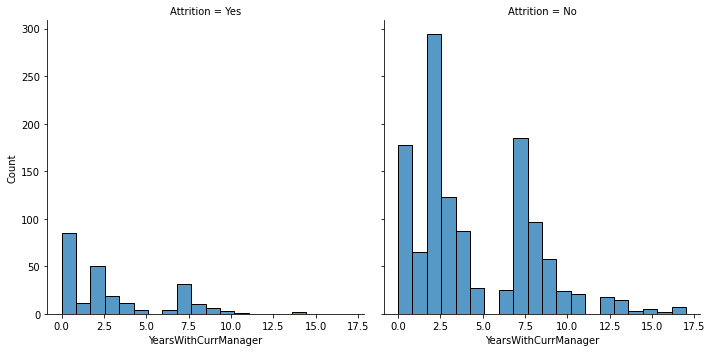

In [23]:
sns.displot(x='YearsWithCurrManager', col='Attrition', data=df)
plt.show()

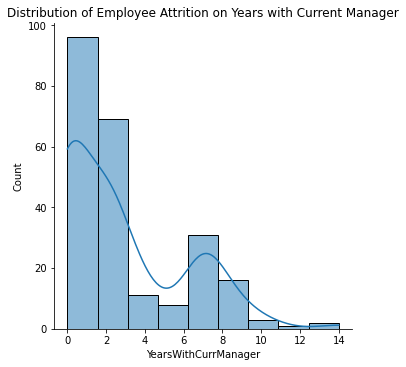

In [24]:
sns.displot(x='YearsWithCurrManager', data=att_df, kde = True).set(title = 'Distribution of Employee Attrition on Years with Current Manager')
plt.show()

This Years with current manager graph is somewhat similar to that of employees in the same role graph, with the majority being <3 years and a bump at around 7 years. This is interesting and something that might be worth investigating as to why there is this bumb around 7 years. Is it just noise or is there something material there? 

After looking at a few interesting features, we can move on to creating a correlation matrix and conduct feature engineering.

In [25]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})

In [26]:
# check correlation between numerical features and target variable
corr_score = df[['Age', 'DailyRate', 'DistanceFromHome', 'Education',
        'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
        'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']].corr()
corr_score

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.006846
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.130016
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.169105
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656,-0.103481
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,0.034814,0.149515,-0.027269,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079,-0.159840


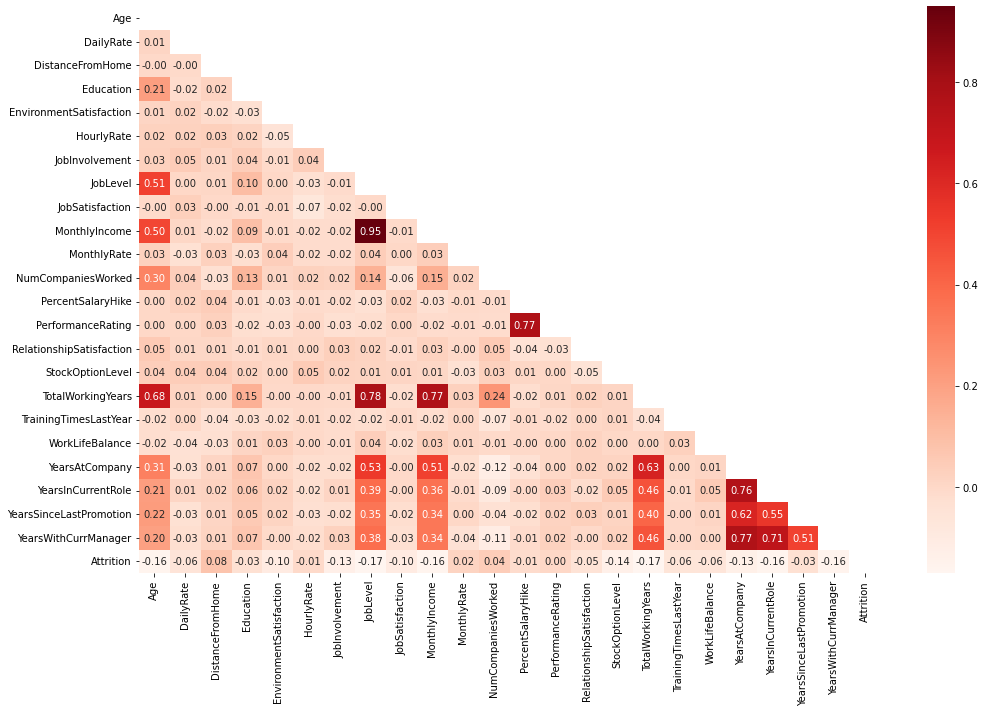

In [27]:
# visualization of correlation relationships
plt.figure(figsize=(15, 10))
mask = np.triu(corr_score)
sns.heatmap(corr_score,cmap="Reds",annot = True, fmt = '.2f',mask = mask)
plt.tight_layout()

Here, we can see the correlation between attrition and any of the numerical features is weak and some features are moderately correlated to each other, meaning we might be able to take out one of the features since its one feature can represent the other. 

We would apply one-hot encoding to categorical (non-numerical) features. This is because the categorical features are not ordinal (no ranking). This means we would have to circle back later to check if there is multicollinearity. 

In [28]:
#drop attrition from the dataframe and seperate attrition to another dataframe
y = df['Attrition']
df_clean = df.drop(columns = ['Attrition'])

In [29]:
# apply one hot encoding to non numerical features
df_clean = pd.get_dummies(df_clean, columns = ['BusinessTravel', 'Gender','MaritalStatus'], drop_first = True)
df_clean = pd.get_dummies(df_clean)
df_clean.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [30]:
# have a look at the columns that would be included in the models
print(list(df_clean.columns))

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Gender_Male', 'MaritalStatus_Married', 'MaritalStatus_Single', 'Department_Human Resources', 'Department_Research & Development', 'Department_Sales', 'EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Directo

In [31]:
# print out the shape of the dataset
get_shape(df_clean)

Now there are 1470 rows and 47 columns in this dataset


In [32]:
# filter out features that needs to be standarized
col_tobe_standard = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 
                   'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 
                   'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
                   'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 
                   'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
                   'YearsWithCurrManager']

## Model Training

In [33]:
# standarization on numercial features so that all the numerical features are having the same type of normal distribution
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in col_tobe_standard:
    df_clean[col] = df_clean[col].astype(float)
    df_clean[[col]] = scaler.fit_transform(df_clean[[col]])
df_clean.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,1,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,0,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,1,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,1,-1.150554,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,0,-0.877232,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [34]:
# split dataset into training set and testing set with stratified sampling so that each dataset contains observations
# for both exit and non exit employees
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_clean,
                                                                    y,
                                                                    test_size=0.20,
                                                                    stratify = y)  
print('Training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('Test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

Training data has 1176 observation with 47 features
Test data has 294 observation with 47 features


In [35]:
# build different machine learning models with the same random state if applicable
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,roc_curve, roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC

#setting random state so results are replicable

lr = LogisticRegression(random_state = 69)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state = 69)
dt = DecisionTreeClassifier(random_state = 69)
mlp = MLPClassifier(random_state = 69)
xg = xgb.XGBClassifier(random_state = 69)
dummy_clf = DummyClassifier(strategy="most_frequent")
svm = SVC(gamma=0.01, probability = True)

Here we used 7 machine learning models plus 1 most frequent baseline model. We are going to evaluate the models below.

### Naive approach (Without hyperparameter tuning)

In [36]:
# naive approach on each models without hyperparameter tuning
model_list = [lr,knn,rf,dt,mlp,xg, dummy_clf,svm]
score_res = []
for model in model_list:
    draft = model_selection.cross_val_score(model, X_train, y_train, cv = 5)
    score_res.append(draft)

[00:03:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:03:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:03:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:03:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [37]:
# print out naive approach performance
model_names = ['Logistic Regression', 'KNN', 'Random Forest','Decision Tree','Neural Network','XG Boost', 'Dummy' , 'SVC']
idx = ['cv_1','cv_2','cv_3','cv_4','cv_5']
df_accuracy = pd.DataFrame(np.array(score_res).T, columns = model_names, index = idx).round(decimals=3)
print(df_accuracy)

      Logistic Regression    KNN  Random Forest  Decision Tree  \
cv_1                0.856  0.835          0.856          0.805   
cv_2                0.864  0.860          0.860          0.770   
cv_3                0.885  0.838          0.855          0.796   
cv_4                0.864  0.843          0.864          0.774   
cv_5                0.889  0.843          0.860          0.791   

      Neural Network  XG Boost  Dummy    SVC  
cv_1           0.839     0.856  0.839  0.839  
cv_2           0.851     0.864  0.838  0.838  
cv_3           0.868     0.860  0.838  0.838  
cv_4           0.868     0.877  0.838  0.838  
cv_5           0.843     0.864  0.838  0.838  


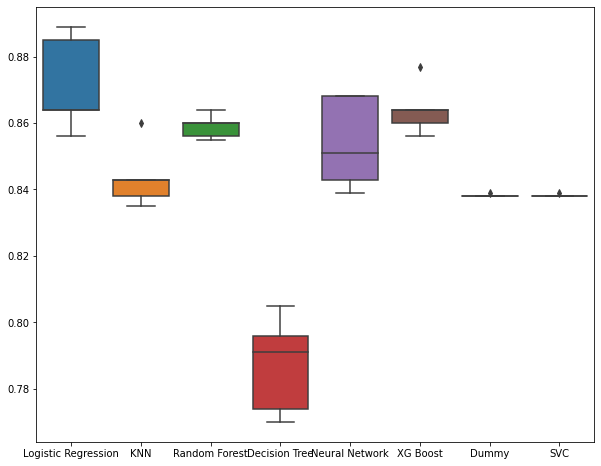

In [38]:
# visualize the performance of different machine learning models
plt.figure(figsize=(10, 8))
sns.boxplot(data = df_accuracy)
plt.savefig('draft.png');

Decision Tree is by far the worst model out of the all the 6 machine learning model. We can see that the dummy model (most frequent means the model is going to predict everything as the no attrition since it is the most frequent result in the dataset) is doing well but we have to bear in mind that the dataset is extremely imbalanced as shown in our analysis.

Here, we see that logistic regression is the best model and we will proceed with fine tuning the model by tuning the hyperparameters of the model first and move our way to other models

## Hyperparameter Tuning

In [39]:
# helper function to get best parameters from best model after grid search cross validation
best_models = []
def get_grid_res(gs):
    print("Best Score:", "{:.3f}".format(gs.best_score_))
    print("Best Parameters:")
    best_params = gs.best_params_
    for k, v in best_params.items():
        print(k, ":", v)

In [40]:
# set kfold number for k fold cross validation method
kfold = model_selection.KFold(n_splits=10)

### Logistic Regression

In [41]:
# hyperparameter tuning for logistic regression
lr_params = {'penalty':('l1', 'l2'), 
          'C':(0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10)}

In [42]:
# apply grid search on each hyperparameter and fit in with data
grid_lr = GridSearchCV(lr, lr_params, cv= kfold)
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=69),
             param_grid={'C': (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10),
                         'penalty': ('l1', 'l2')})

In [43]:
lr_res = grid_lr.cv_results_

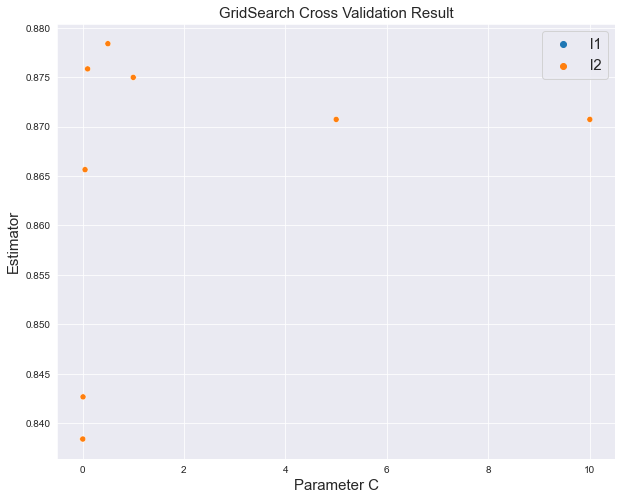

In [44]:
# visualize the affect of different hyperparameters on performance
sns.set_style('darkgrid')
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'param_C', y = 'mean_test_score',hue = 'param_penalty',data = lr_res)
plt.xlabel('Parameter C',fontsize = 15)
plt.ylabel('Estimator',fontsize = 15)
plt.title('GridSearch Cross Validation Result',fontsize = 15)
plt.legend(fontsize = 15)
plt.savefig('LR.png');

In [45]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_lr)

Best Score: 0.878
Best Parameters:
C : 0.5
penalty : l2


In [46]:
best_lr_model = grid_lr.best_estimator_

In [47]:
# append the best model to the list for other evalution
best_models.append(('Logistic Regression', best_lr_model))

### KNN 

In [48]:
# hyperparameter tuning for K nearest neighbors
knn_params = {
    'n_neighbors':[3,5,7,9,11,13,15,17,21,31,59,61,63] 
}

In [49]:
# apply grid search on each hyperparameter and fit in with data
grid_knn = GridSearchCV(knn, knn_params, cv= kfold)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 21, 31, 59,
                                         61, 63]})

In [50]:
knn_res = grid_knn.cv_results_

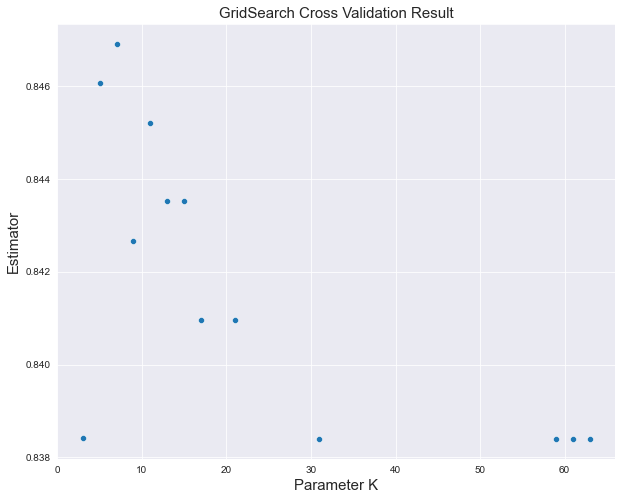

In [51]:
# visualize the affect of different hyperparameters on performance
sns.set_style('darkgrid')
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'param_n_neighbors', y = 'mean_test_score',data = knn_res)
plt.xlabel('Parameter K',fontsize = 15)
plt.ylabel('Estimator',fontsize = 15)
plt.title('GridSearch Cross Validation Result',fontsize = 15)
plt.savefig('knn.png');

In [52]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_knn)

Best Score: 0.847
Best Parameters:
n_neighbors : 7


In [53]:
best_knn_model = grid_knn.best_estimator_

In [54]:
# append the best model to the list for other evalution
best_models.append(('K Nearest Neighbors',best_knn_model))

### Random Forest

In [55]:
# hyperparameter tuning for random forest
params_rf = {
    'n_estimators': [20,40,60,80],
    'min_samples_split':[4,6,8],
    'max_depth': [1, 5, 10, 15],
    'max_features': ['sqrt', 'auto','log2']
}
grid_rf = GridSearchCV(rf,params_rf, cv=kfold)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=69),
             param_grid={'max_depth': [1, 5, 10, 15],
                         'max_features': ['sqrt', 'auto', 'log2'],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [20, 40, 60, 80]})

In [56]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_rf)

Best Score: 0.859
Best Parameters:
max_depth : 10
max_features : sqrt
min_samples_split : 4
n_estimators : 20


In [57]:
rf_res = grid_rf.cv_results_

In [58]:
best_rf_model = grid_rf.best_estimator_

In [59]:
# append the best model to the list for other evalution
best_models.append(('Random Forest', best_rf_model))

### Decision Tree

In [60]:
# hyperparameter tuning for decision tree
params_dt = {
    'max_depth':[1,5,10,15],
    'min_samples_split':[2,4,6,8,10]
}
grid_dt = GridSearchCV(dt,params_dt, cv=kfold)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=69),
             param_grid={'max_depth': [1, 5, 10, 15],
                         'min_samples_split': [2, 4, 6, 8, 10]})

In [61]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_dt)

Best Score: 0.838
Best Parameters:
max_depth : 1
min_samples_split : 2


In [62]:
best_dt_model = grid_dt.best_estimator_

In [63]:
# append the best model to the list for other evalution
best_models.append(('Decision Tree', best_dt_model))

### MLP (Neural Network)

In [64]:
# hyperparameter tuning for multi layer perceptrons
params_mlp = {
    'hidden_layer_sizes': [(10,),(20,),(30,)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.001, 0.01, 0.1]
}
grid_mlp = GridSearchCV(mlp,params_mlp, cv = kfold)
grid_mlp.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=MLPClassifier(random_state=69),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.001, 0.01, 0.1],
                         'hidden_layer_sizes': [(10,), (20,), (30,)]})

In [65]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_mlp)

Best Score: 0.873
Best Parameters:
activation : tanh
alpha : 0.1
hidden_layer_sizes : (10,)


In [66]:
best_mlp_model = grid_mlp.best_estimator_

In [67]:
# append the best model to the list for other evalution
best_models.append(('Neural Network', best_mlp_model))

### XGBoost (Extreme Boosting Tree)

In [68]:
# hyperparameter tuning for extreme boosting tree aka xgboost
params_xgb = {
        'subsample': [0.4, 0.6, 0.8],
        'max_depth': [1,5,10,15],
        'n_estimators':[40,60,80],
        'reg_alpha':[0.01, 0.05, 0.1, 0.5, 1, 5],
        'reg_lambda':[0.01, 0.05, 0.1, 0.5, 1, 5],
        'eta':[0.4,0.6,0.8],
        'learning_rate':[0.1, 0.3, 0.5]
        }

In [69]:
from sklearn.model_selection import RandomizedSearchCV
grid_xgb = RandomizedSearchCV(xg, params_xgb,cv = kfold,n_iter = 50)
grid_xgb.fit(X_train, y_train)

[00:06:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:06:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:06:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:06:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:06:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:06:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:06:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:06:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:06:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:06:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:06:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:06:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:07:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:07:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:07:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:07:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:07:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:07:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:07:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:07:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:07:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:07:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:07:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:07:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:07:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:07:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:07:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:07:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:07:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:07:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:07:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:07:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:07:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:07:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:07:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:07:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_c...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
     

In [70]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_xgb)

Best Score: 0.884
Best Parameters:
subsample : 0.8
reg_lambda : 5
reg_alpha : 0.01
n_estimators : 80
max_depth : 1
learning_rate : 0.5
eta : 0.6


In [71]:
best_xgb_model = grid_xgb.best_estimator_

In [72]:
# append the best model to the list for other evalution
best_models.append(('Extreme Boosting Tree', best_xgb_model))

### SVC

In [73]:
# hyperparameter tuning for svc
param_svc = {
    'gamma':[0.01, 0.1, 1, 10, 100],
    "C": [0.01,0.1, 1.0, 10, 100]
}

In [74]:
grid_svc = RandomizedSearchCV(svm, param_svc, cv=kfold, verbose=2, n_jobs=-1, n_iter=50)
grid_svc.fit(X_train, y_train);

Fitting 10 folds for each of 25 candidates, totalling 250 fits


In [75]:
get_grid_res(grid_svc)

Best Score: 0.866
Best Parameters:
gamma : 0.01
C : 10


In [76]:
best_svc_model = grid_svc.best_estimator_

In [77]:
best_svc_model.predict_proba(X_test)

array([[0.86287755, 0.13712245],
       [0.706867  , 0.293133  ],
       [0.7870777 , 0.2129223 ],
       [0.66408058, 0.33591942],
       [0.95273522, 0.04726478],
       [0.1221245 , 0.8778755 ],
       [0.67016991, 0.32983009],
       [0.79043451, 0.20956549],
       [0.90372353, 0.09627647],
       [0.86538392, 0.13461608],
       [0.66298548, 0.33701452],
       [0.95892262, 0.04107738],
       [0.9406149 , 0.0593851 ],
       [0.12672089, 0.87327911],
       [0.80351331, 0.19648669],
       [0.94415461, 0.05584539],
       [0.94372285, 0.05627715],
       [0.97900534, 0.02099466],
       [0.94948312, 0.05051688],
       [0.89902741, 0.10097259],
       [0.9420765 , 0.0579235 ],
       [0.9396849 , 0.0603151 ],
       [0.92783595, 0.07216405],
       [0.95034945, 0.04965055],
       [0.98245837, 0.01754163],
       [0.95042181, 0.04957819],
       [0.74004166, 0.25995834],
       [0.75762231, 0.24237769],
       [0.28363706, 0.71636294],
       [0.98474919, 0.01525081],
       [0.

In [78]:
best_models.append(('Support-Vector Machine', best_svc_model))

In [79]:
# print out the list of optimized models
for name,model in best_models:
    print(name)

Logistic Regression
K Nearest Neighbors
Random Forest
Decision Tree
Neural Network
Extreme Boosting Tree
Support-Vector Machine


In [80]:
# helper function to print out and visualize the evaluation result of each model including
# confusion matrix, precison-recall and f1 score
def plot_cm(models):
    sns.set_style('dark')
    class_names = ['No','Yes']
    for model_name, model in models:
        cm = confusion_matrix(y_test,model.predict(X_test))
        tn = cm[0][0]
        fp = cm[0][1]
        fn = cm[1][0]
        tp = cm[1][1]
        accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
        precision = tp / (tp + fp + 0.0)
        recall = tp / (tp + fn + 0.0)
        f1 = 2 / (( 1 / precision) + ( 1 / recall))
        plot_confusion_matrix(model, X_test, y_test,
                              display_labels=class_names,
                              cmap="Reds")
        plt.title(model_name, fontsize = 15)
        plt.ylabel('Actual',fontsize = 15)
        plt.xlabel('Predicted\nAccuracy = {}\nPrecision = {}\nRecell = {}\nF1 = {}'
                   .format((round(accuracy, 3)),round(precision, 3),round(recall, 3),round(f1, 3)), fontsize = 15)

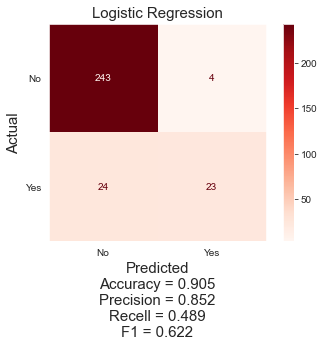

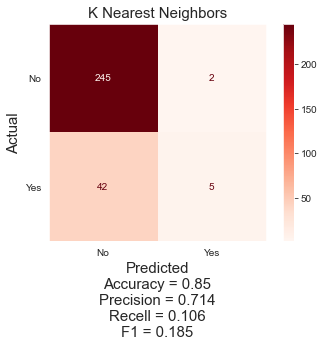

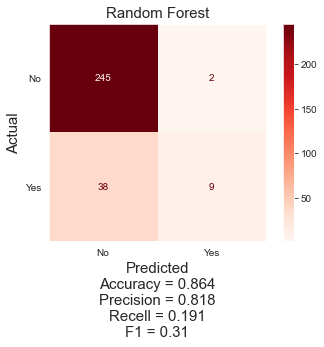

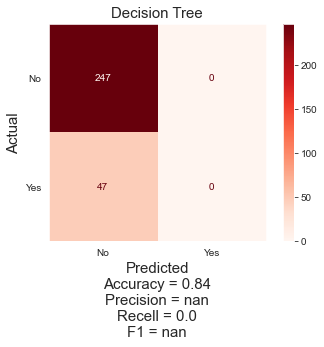

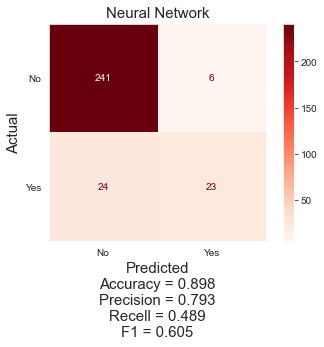

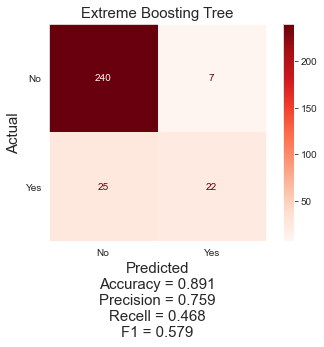

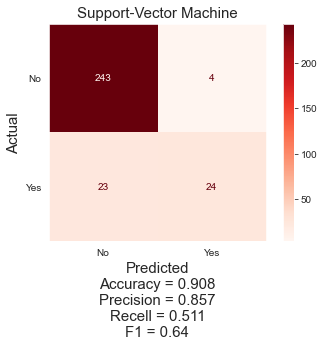

In [81]:
plot_cm(best_models)
plt.savefig('cm.png')

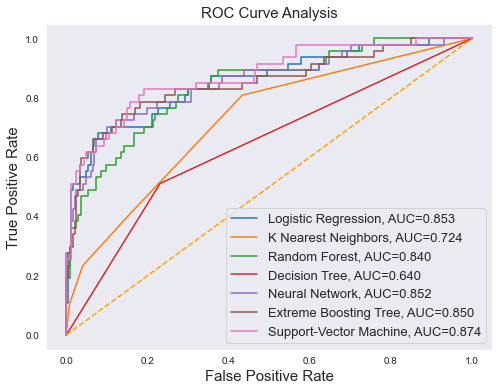

In [82]:
# visualize ROC curve for each optimized model
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for model_name, model in best_models:
        yproba = model.predict_proba(X_test)[::,1]

        fpr, tpr, _ = roc_curve(y_test,  yproba)
        auc = roc_auc_score(y_test, yproba)
        result_table = result_table.append({'classifiers':model_name,
                                            'fpr':fpr, 
                                            'tpr':tpr, 
                                            'auc':auc}, ignore_index=True)

    # Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis',fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.savefig('ROC.png');

Here, we can see the Logisitc Regression is the best model out of all the models we have selected, with Neural network and extreme boosting tree trailing slightly in terms of AUC, which measures the quality of the model. 

### Understanding what features are important in the models

In [83]:
# helper function to visualize feature importance from random forest and LASSO
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}).sort_values('feature_importance', ascending = False)\
    .reset_index(drop = True)
    return df

def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'blue')
    plt.title(title, fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel(imp_df.columns[1], fontsize = 20)
    plt.ylabel(imp_df.columns[0], fontsize = 20)
    plt.tight_layout()

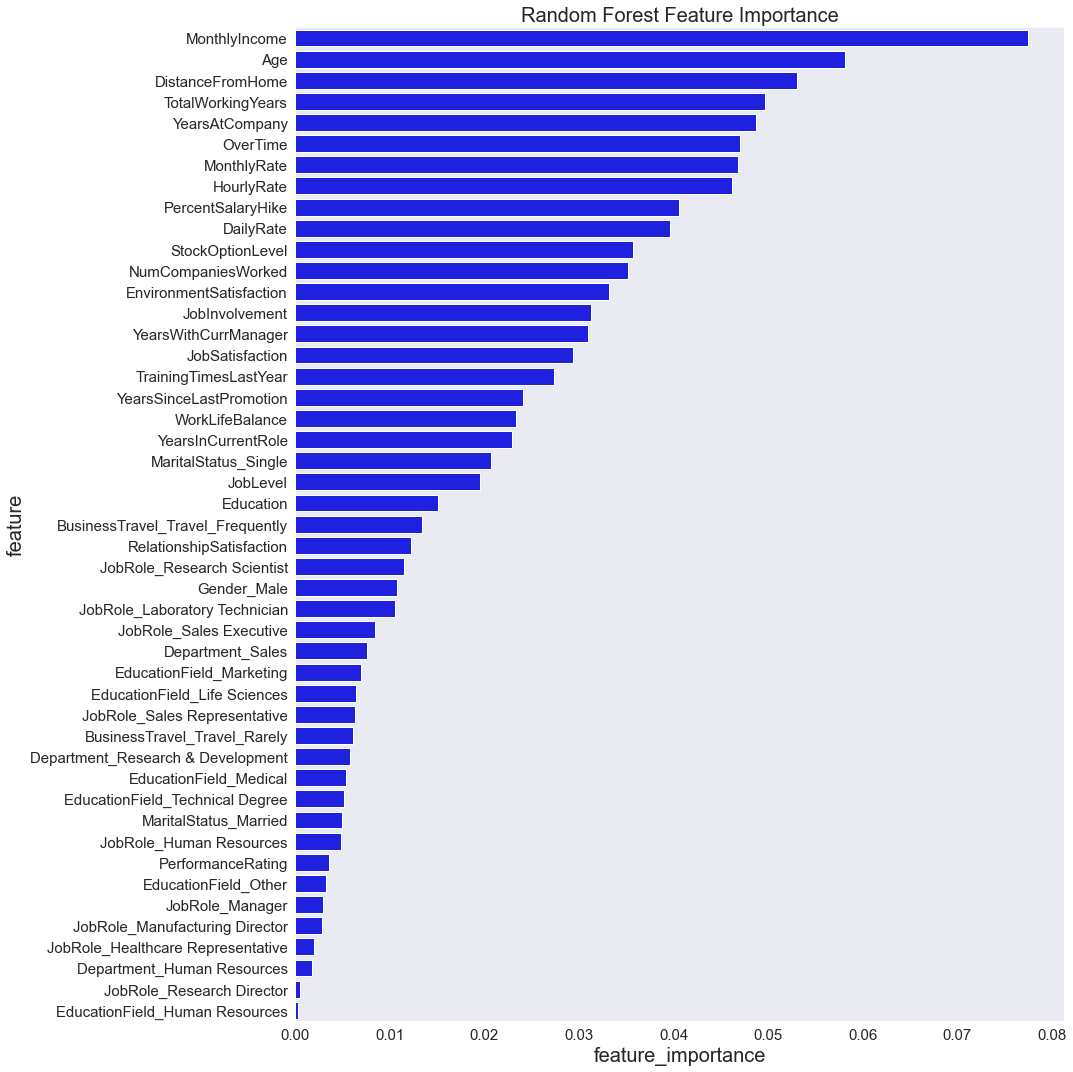

In [84]:
base_imp = imp_df(X_train.columns, best_rf_model.feature_importances_)
plt.figure(figsize=(15, 15))
var_imp_plot(base_imp, 'Random Forest Feature Importance')
plt.savefig('feature_importance.png')

We can see that the usual suspect are the important feature of a random forest model, such as income, age, number of working years. 

In [85]:
# build a LASSO model for feature selection
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X_train, y_train)
coef = pd.DataFrame(reg.coef_, index = X_train.columns)
coef = imp_df(X_train.columns, reg.coef_)

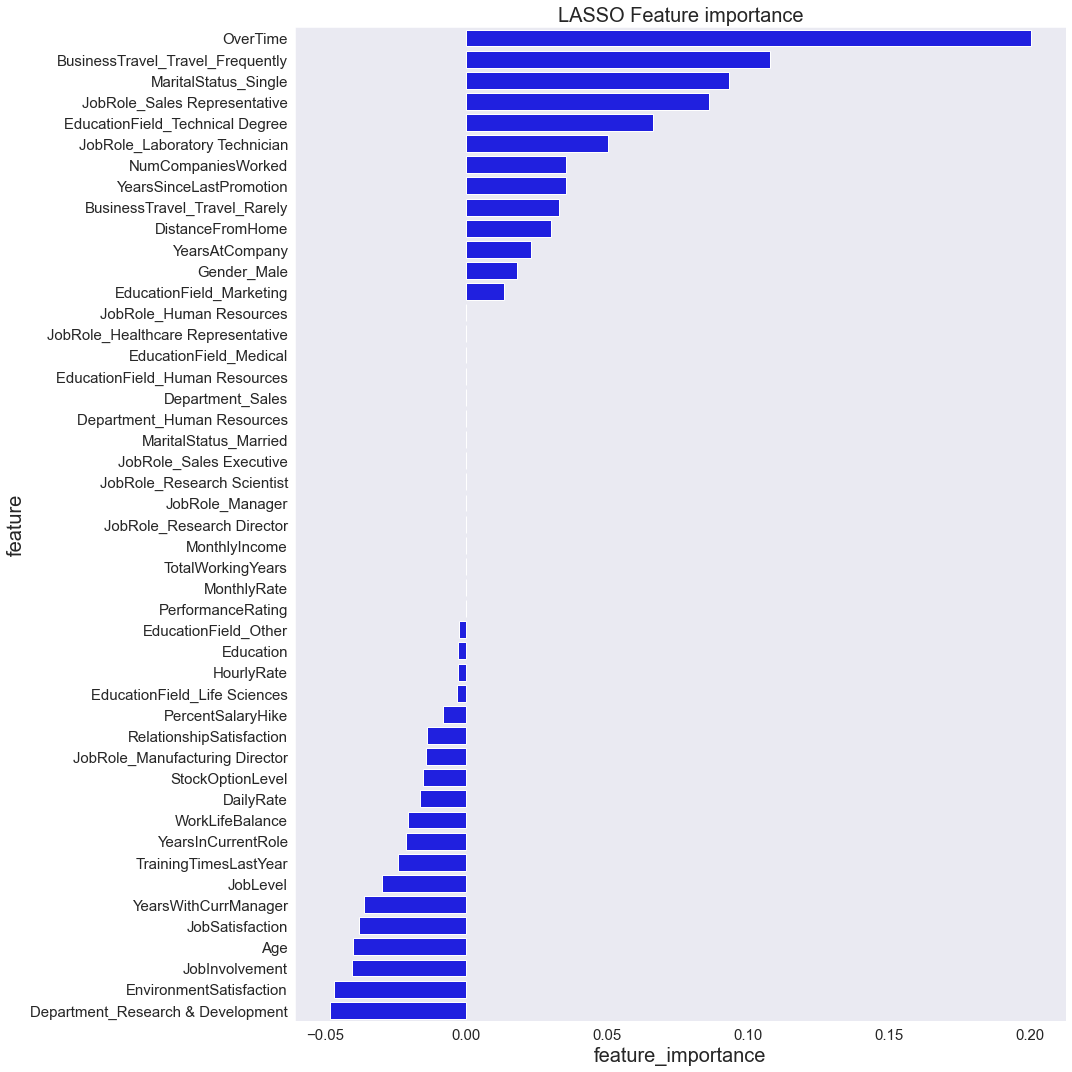

In [86]:
plt.figure(figsize=(15, 15))
var_imp_plot(coef, 'LASSO Feature importance')
plt.savefig('L1_feature_importance.png');

Here we can see that the amount of overtime as well as the joby type and marital status being important features in a LASSO model

## Work Referenced

https://www.slideshare.net/ShivangiKrishna/ibm-hr-analytics-employee-attrition-performance

https://towardsdatascience.com/machine-learning-target-feature-label-imbalance-problem-and-solutions-98c5ae89ad0

https://github.com/whwbj/IBM-HR-employee-Attrition-Prediction-Study/blob/main/IBM%20HR%20Analytics%20Employee%20Attrition%20and%20Performance%20Project.ipynb

https://github.com/whwbj/IBM-HR-employee-Attrition-Prediction-Study#contents-of-the-project

https://github.com/denistanjingyu/IBM-HR-Analytics

https://github.com/amoghrao8/ibm-attrition/blob/main/Attrition%20Part%202%20-%20EDA%2C%20Statistical%20Analysis%2C%20Predictive%20Modeling%20and%20Visualization%20with%20R.ipynb